In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Path
DATASET_PATH='../dataset/combined_dataset.csv'
OUTPUT_IMGS_PATH='../assets/imgs/output_charts/'

def load_data(dataset_path: str) -> pd.DataFrame:
    """
    Load the specified dataset and returns it.

    :param str dataset_path: The path to the dataset to import.
    :return: pd.DataFrame containing the imported dataset.
    """
    df = pd.read_csv(dataset_path, low_memory=False)

    string_cols = ['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'protocol', 'label']
    
    for col in df.columns:
        if col not in string_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')   
    
    return df

if __name__ == '__main__':
    df = load_data(DATASET_PATH)

## EDA - Esploratory Data Analysis 

In [2]:
df.head(5)

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label
0,172.16.0.1_60744_192.168.10.50_21_TCP_2017-07-...,2017-07-07 13:14:05.497800,172.16.0.1,60744.0,192.168.10.50,21.0,TCP,0.003921,7.0,4.0,...,0.001898,0.000871,0.002769,0.001028,0.003797,0.0,0.0,0.0,0.0,Port_Scan
1,172.16.0.1_45018_192.168.10.50_22_TCP_2017-07-...,2017-07-07 13:14:05.497803,172.16.0.1,45018.0,192.168.10.50,22.0,TCP,0.011778,7.0,4.0,...,0.005830,0.003743,0.009573,0.002087,0.011660,0.0,0.0,0.0,0.0,Port_Scan
2,172.16.0.1_60754_192.168.10.50_21_TCP_2017-07-...,2017-07-07 13:14:17.054064,172.16.0.1,60754.0,192.168.10.50,21.0,TCP,0.004274,7.0,4.0,...,0.002071,0.000948,0.003019,0.001124,0.004143,0.0,0.0,0.0,0.0,Port_Scan
3,172.16.0.1_45028_192.168.10.50_22_TCP_2017-07-...,2017-07-07 13:14:17.054116,172.16.0.1,45028.0,192.168.10.50,22.0,TCP,0.011113,7.0,4.0,...,0.005488,0.003066,0.008554,0.002422,0.010976,0.0,0.0,0.0,0.0,Port_Scan
4,172.16.0.1_60764_192.168.10.50_21_TCP_2017-07-...,2017-07-07 13:14:28.373033,172.16.0.1,60764.0,192.168.10.50,21.0,TCP,0.004356,7.0,4.0,...,0.002154,0.001104,0.003257,0.001050,0.004307,0.0,0.0,0.0,0.0,Port_Scan


In [3]:
df.tail()

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label
2438048,172.16.0.1_443_192.168.10.51_48055_TCP_2017-07...,2017-07-05 09:13:34.489255,172.16.0.1,443.0,192.168.10.51,48055.0,TCP,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_Slowloris
2438049,172.16.0.1_443_192.168.10.51_48056_TCP_2017-07...,2017-07-05 09:13:39.549132,172.16.0.1,443.0,192.168.10.51,48056.0,TCP,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_Slowloris
2438050,172.16.0.1_443_192.168.10.51_48057_TCP_2017-07...,2017-07-05 09:13:44.599165,172.16.0.1,443.0,192.168.10.51,48057.0,TCP,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_Slowloris
2438051,172.16.0.1_443_192.168.10.51_48058_TCP_2017-07...,2017-07-05 09:13:49.649183,172.16.0.1,443.0,192.168.10.51,48058.0,TCP,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_Slowloris
2438052,172.16.0.1_443_192.168.10.51_48059_TCP_2017-07...,2017-07-05 09:13:54.669225,172.16.0.1,443.0,192.168.10.51,48059.0,TCP,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_Slowloris


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438053 entries, 0 to 2438052
Data columns (total 122 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    flow_id                     object 
 1    timestamp                   object 
 2    src_ip                      object 
 3    src_port                    float64
 4    dst_ip                      object 
 5    dst_port                    float64
 6    protocol                    object 
 7    duration                    float64
 8    packets_count               float64
 9    fwd_packets_count           float64
 10   bwd_packets_count           float64
 11   total_payload_bytes         float64
 12   fwd_total_payload_bytes     float64
 13   bwd_total_payload_bytes     float64
 14   payload_bytes_max           float64
 15   payload_bytes_min           float64
 16   payload_bytes_mean          float64
 17   payload_bytes_std           float64
 18   payload_bytes_variance      float64
 19 

In [5]:
from typing import Tuple

def check_for_nans_and_duplicates(dataframe: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Check for duplicates and NaN values in the given dataframe.

    :param pd.DataFrame dataframe: The dataframe to check.
    :return: A tuple containing:
             - A DataFrame with duplicated rows.
             - A Series with the count of NaN values for each column.
    """
    duplicates = dataframe[dataframe.duplicated()]
    print(f"N. of duplicates: {duplicates.shape[0]}")
    
    nan_summary = dataframe.isna().sum()
    nan_columns = nan_summary[nan_summary > 0]
    print(f"\nColumns with NaNs:")
    if not nan_columns.empty:
        print(nan_columns)
    else:
        print("No NaN values found.")
    
    return duplicates, nan_summary

if __name__ == '__main__':
    check_for_nans_and_duplicates(df)

N. of duplicates: 2360

Columns with NaNs:
src_port                 1
dst_port                 1
duration                 1
packets_count            1
fwd_packets_count        1
                        ..
bwd_packets_IAT_total    1
subflow_fwd_packets      1
subflow_bwd_packets      1
subflow_fwd_bytes        1
subflow_bwd_bytes        1
Length: 116, dtype: int64


In [6]:
def get_unique_target_values(dataframe: pd.DataFrame, target_column: str) -> list:
    """
    Get unique values from the target column of the dataframe.

    :param pd.DataFrame dataframe: The dataframe to analyze.
    :param str target_column: The name of the target column.
    :return: A list of unique values from the target column.
    """
    return dataframe[target_column].unique().tolist()

if __name__ == '__main__':
    target_values = get_unique_target_values(df, 'label')
    print(f"Unique target values: {target_values}")

Unique target values: ['Port_Scan', 'label', 'SSH-Patator', 'Web_SQL_Injection', 'Web_Brute_Force', 'Web_XSS', 'Benign', 'Botnet_ARES', 'DoS_GoldenEye', 'Heartbleed', 'DDoS_LOIT', 'FTP-Patator', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_Slowloris']


In [7]:
# removing the row that contains the headers of the dataset
df[df['label'] == 'label']
df = df.drop(df[df['label'] == 'label'].index)

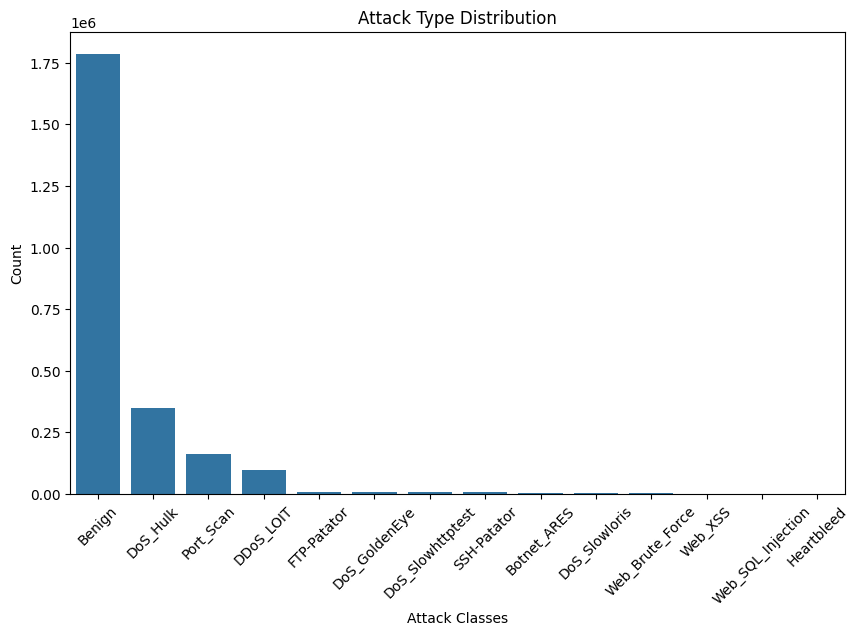

In [8]:
def plot_attacks_distribution(dataframe: pd.DataFrame, target_column: str) -> None:
    """
    Plot the distribution of the attack types.

    :param pd.DataFrame dataframe: The dataframe containing the target column.
    :param str target_column: The name of the target column.
    :return: None
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=target_column, order=dataframe[target_column].value_counts().index)
    plt.title('Attack Type Distribution')
    plt.xlabel('Attack Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

if __name__ == '__main__':
    plot_attacks_distribution(df, 'label')

In [9]:
# If we are considering binary classification (Normal vs Attack), we can map all attack types to a single 'Malicious' label.
def binary_classification_mapping(dataset: pd.DataFrame, target_column: str) -> pd.DataFrame:
    """
    Map all attack types to a single 'Malicious' label for binary classification.

    :param pd.DataFrame dataset: The dataset to modify.
    :param str target_column: The name of the target column.
    :return: The modified dataset with binary classification labels.
    """
    dataset[target_column] = dataset[target_column].apply(lambda x: 'Benign' if x == 'Benign' else 'Malicious')
    return dataset

if __name__ == '__main__':
    df_binary = binary_classification_mapping(df.copy(), 'label')

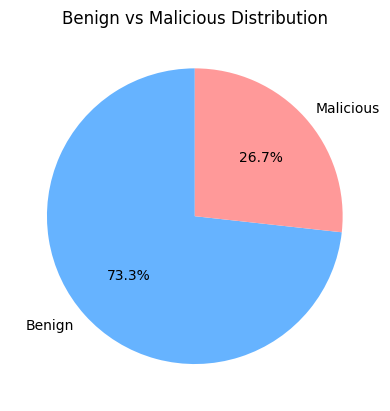

In [10]:
def plot_benign_vs_malicious(dataframe: pd.DataFrame) -> None:
    """
    Plot the distribution of benign vs malicious samples in the dataset with a pie chart.

    :param pd.DataFrame dataframe: The dataframe to analyze.
    """
    fig, ax = plt.subplots()
    ax.pie(dataframe['label'].value_counts(), labels=dataframe['label'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    ax.set_title('Benign vs Malicious Distribution')
    plt.savefig(f'{OUTPUT_IMGS_PATH}/benign_vs_malicious_distribution.png', dpi=200)
    plt.show()


if __name__ == '__main__':
    plot_benign_vs_malicious(df_binary)

## Data Cleaning

In [11]:
from typing import List


def clean_data(dataset: pd.DataFrame, columns_to_remove: List[str]) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Clean the dataset by removing duplicates, handling NaN values, and replacing infinite values.
    Eventually, separates features and target variable.

    :param pd.DataFrame dataset: The dataset to clean.
    :param List[str] columns_to_remove: The columns to remove from the dataset.
    :return: The cleaned dataset and the target column.
    """

    dataset = dataset.drop_duplicates()
    dataset = dataset.replace([np.inf, -np.inf], np.nan)
    dataset = dataset.dropna()
    dataset = dataset.drop(columns=columns_to_remove)

    # added rounding of float columns to 4 decimal places
    float_cols = dataset.select_dtypes(include=['float']).columns
    dataset[float_cols] = dataset[float_cols].round(4)

    # Separate features and target variable
    X = dataset.drop(columns=['label'])
    y = dataset['label']

    return X, y



if __name__ == '__main__':
    columns_to_remove = ['flow_id', 'src_ip', 'src_port', 'dst_ip', 'timestamp']
    len_before = df.shape[0]
    X_clean, y_clean = clean_data(df, columns_to_remove)
    len_after = X_clean.shape[0]


In [12]:
X_clean.head()

,dst_port,protocol,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,fwd_packets_IAT_total,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes
0,21.0,TCP,0.0039,7.0,4.0,3.0,20.0,0.0,20.0,20.0,...,0.0039,0.0019,0.0009,0.0028,0.0010,0.0038,0.0,0.0,0.0,0.0
1,22.0,TCP,0.0118,7.0,4.0,3.0,41.0,0.0,41.0,41.0,...,0.0112,0.0058,0.0037,0.0096,0.0021,0.0117,0.0,0.0,0.0,0.0
2,21.0,TCP,0.0043,7.0,4.0,3.0,20.0,0.0,20.0,20.0,...,0.0042,0.0021,0.0009,0.0030,0.0011,0.0041,0.0,0.0,0.0,0.0
3,22.0,TCP,0.0111,7.0,4.0,3.0,41.0,0.0,41.0,41.0,...,0.0105,0.0055,0.0031,0.0086,0.0024,0.0110,0.0,0.0,0.0,0.0
4,21.0,TCP,0.0044,7.0,4.0,3.0,20.0,0.0,20.0,20.0,...,0.0043,0.0022,0.0011,0.0033,0.0010,0.0043,0.0,0.0,0.0,0.0


In [13]:
def create_binary_labels(y: pd.Series) -> pd.Series:
    """
    Convert multi-class labels to binary (Benign=0, Attack=1).
    
    :param pd.Series y: Original labels with multiple attack types.
    :return: Binary labels (0 = Benign, 1 = Attack).
    """
    # Every class different from 'Benign' becomes 1 (Attack)
    return (y != 'Benign').astype(int)

if __name__ == '__main__':
    y_binary = create_binary_labels(y_clean)

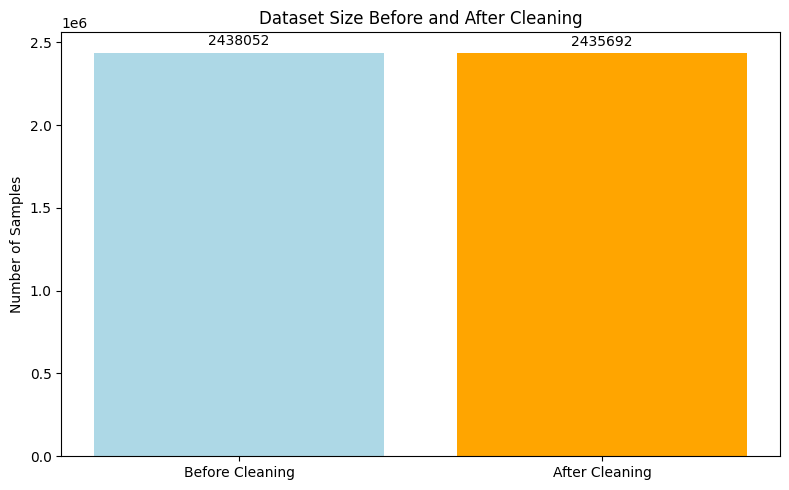

In [14]:
def plot_dataset_comparision(len_before: int, len_after: int) -> None:
    """
    Plot a comparison of dataset size before and after cleaning.

    :param int len_before: Length of the dataset before cleaning.
    :param int len_after: Length of the dataset after cleaning.
    """
    labels = ["Before Cleaning", "After Cleaning"]
    values = [len_before, len_after]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=['lightblue', 'orange'])

    plt.title("Dataset Size Before and After Cleaning")
    plt.ylabel("Number of Samples")

    # numeric labels
    try:
        plt.bar_label(bars, labels=[str(v) for v in values], padding=3)
    except AttributeError:
        for rect, v in zip(bars, values):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_height()
            plt.text(x, y, str(v), ha="center", va="bottom")

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_IMGS_PATH}/dataset_size_comparison.png', dpi=200)
    plt.show()
    plt.close()

if __name__ == '__main__':
    plot_dataset_comparision(len_before, len_after)

## Data Preprocessing

### Feature Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(X: pd.DataFrame) -> pd.DataFrame:
    """
    Encode categorical variables (protocol) using Label Encoding.
    """
    X_encoded = X.copy()
    le = LabelEncoder()
    
    if 'protocol' in X_encoded.columns:
        X_encoded['protocol'] = le.fit_transform(X_encoded['protocol'])
    
    return X_encoded

if __name__ == '__main__':
    X_encoded = encode_categorical_features(X_clean)


In [16]:
if __name__ == '__main__':
    target_values = get_unique_target_values(X_encoded, 'protocol')
    print(f"Unique protocol values: {target_values}")

Unique protocol values: [0, 1]


### Splitting dataset

In [17]:
def split_dataset(X: pd.DataFrame, y: pd.Series, test_size: float, random_state: int) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Split the dataset into training and testing sets.

    :param pd.DataFrame X: Features.
    :param pd.Series y: Target variable.
    :param float test_size: Proportion of the dataset to include in the test split.
    :param int random_state: Random seed for reproducibility.
    :return: X_train, X_test, y_train, y_test
    """
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    return X_train, X_test, y_train, y_test

if __name__ == '__main__':
    X_train, X_test, y_train, y_test = split_dataset(X_encoded, y_binary, test_size=0.2, random_state=42)

### Feature Selection


Initial features: 116

Variance Filtering
[INFO] Removing low variance features (threshold: 0.01)
       Initial features: 116
       Removed: 9 features
       Remaining: 107 features

Correlation Filtering
[INFO] Removing correlated features (threshold: 0.95)
       Initial features: 107
       Removed: 47 features
       Remaining: 60 features

[INFO] Displaying first 50 features (too many to visualize all)


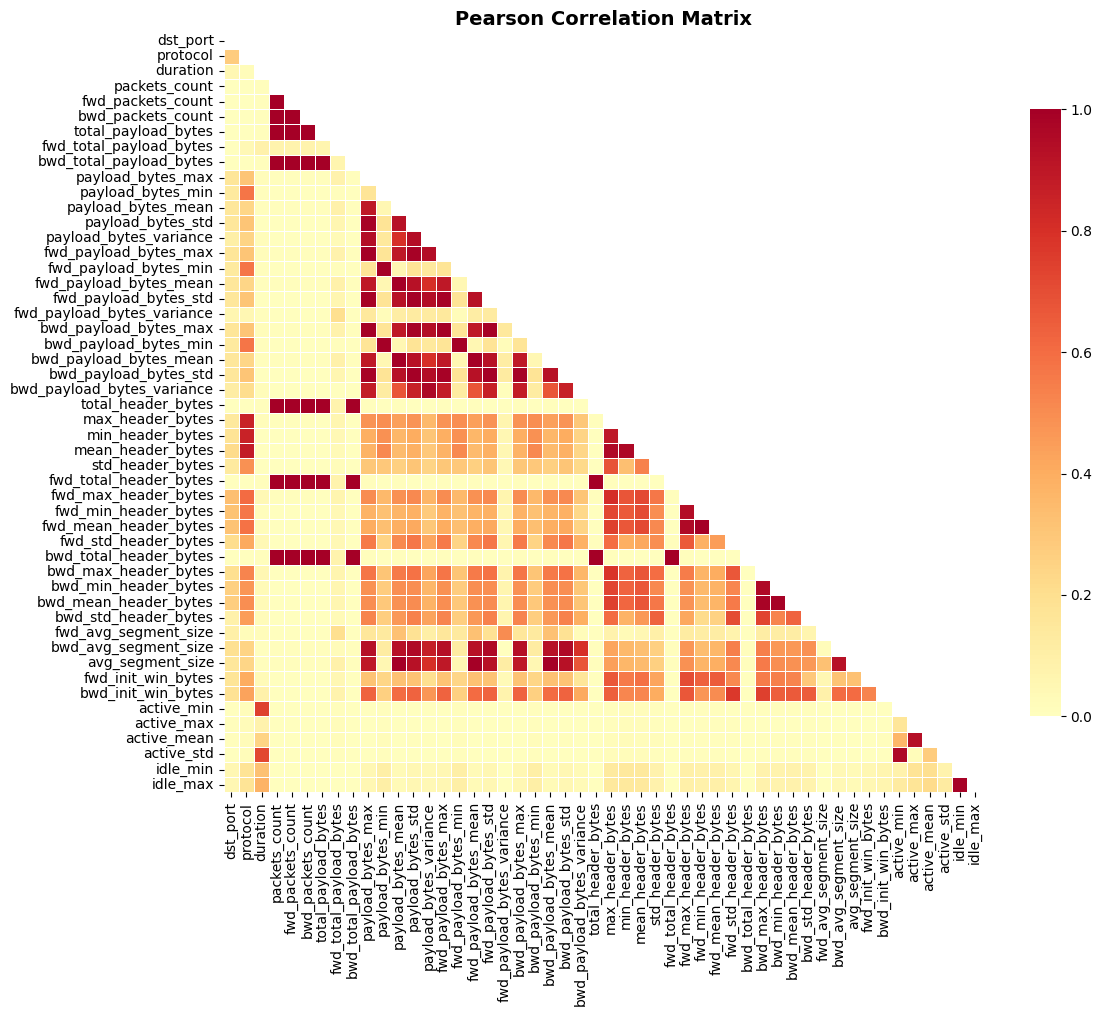

Mutual Information Selection
[INFO] Selecting top 50 features using Mutual Information
       Initial features: 60
       Selected: 50 features

       Top 10 features:
         dst_port: 0.3457
         rst_flag_counts: 0.3181
         payload_bytes_variance: 0.3135
         payload_bytes_mean: 0.3087
         payload_bytes_max: 0.3005
         std_header_bytes: 0.2884
         max_header_bytes: 0.2673
         fwd_min_header_bytes: 0.2625
         fwd_max_header_bytes: 0.2589
         fwd_total_payload_bytes: 0.2502

FEATURE SELECTION SUMMARY
Initial features:  116
After variance:    107 (-9)
After correlation: 60 (-47)
Final selected:    50 (-10)
Total reduction:   66 features (56.9%)



In [18]:
def remove_low_variance_features(X: pd.DataFrame, threshold: float = 0.01) -> pd.DataFrame:
    """
    Remove features with low variance.
    
    :param pd.DataFrame X: Features dataframe.
    :param float threshold: Minimum variance threshold (default: 0.01).
    :return: pd.DataFrame with low variance features removed.
    """
    from sklearn.feature_selection import VarianceThreshold
    
    print(f"[INFO] Removing low variance features (threshold: {threshold})")
    print(f"       Initial features: {X.shape[1]}")
    
    selector = VarianceThreshold(threshold=threshold)
    X_filtered = pd.DataFrame(
        selector.fit_transform(X),
        columns=X.columns[selector.get_support()],
        index=X.index
    )
    
    removed = X.shape[1] - X_filtered.shape[1]
    print(f"       Removed: {removed} features")
    print(f"       Remaining: {X_filtered.shape[1]} features\n")
    
    return X_filtered


def remove_correlated_features(X: pd.DataFrame, threshold: float = 0.95) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Remove highly correlated features using Pearson correlation.
    
    :param pd.DataFrame X: Features dataframe.
    :param float threshold: Correlation threshold (default: 0.95).
    :return: Tuple of (filtered dataframe, correlation matrix).
    """
    print(f"[INFO] Removing correlated features (threshold: {threshold})")
    print(f"       Initial features: {X.shape[1]}")
    
    # Calculate Pearson correlation matrix
    corr_matrix = X.corr().abs()
    
    # Get upper triangle (avoid duplicates)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation > threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    X_filtered = X.drop(columns=to_drop)
    
    print(f"       Removed: {len(to_drop)} features")
    print(f"       Remaining: {X_filtered.shape[1]} features\n")
    
    return X_filtered, corr_matrix


def select_top_features(X: pd.DataFrame, y: pd.Series, k: int = 50) -> pd.DataFrame:
    """
    Select top K features using Mutual Information.
    
    :param pd.DataFrame X: Features dataframe.
    :param pd.Series y: Target variable.
    :param int k: Number of features to select (default: 50).
    :return: pd.DataFrame with top K features.
    """
    from sklearn.feature_selection import mutual_info_classif
    
    print(f"[INFO] Selecting top {k} features using Mutual Information")
    print(f"       Initial features: {X.shape[1]}")
    
    k = min(k, X.shape[1]) 
    
    # Calculate MI scores
    mi_scores = mutual_info_classif(X, y, random_state=42)
    
    # Select top K features
    mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
    mi_df = mi_df.sort_values('mi_score', ascending=False)
    
    top_features = mi_df.head(k)['feature'].tolist()
    X_selected = X[top_features]
    
    print(f"       Selected: {k} features")
    print(f"\n       Top 10 features:")
    for idx, row in mi_df.head(10).iterrows():
        print(f"         {row['feature']}: {row['mi_score']:.4f}")
    print()
    
    return X_selected


def visualize_correlation_matrix(corr_matrix: pd.DataFrame, max_features: int = 50) -> None:
    """
    Visualize Pearson correlation matrix (heatmap).
    
    :param pd.DataFrame corr_matrix: Correlation matrix.
    :param int max_features: Maximum features to display (default: 50).
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Limit size for readability
    if corr_matrix.shape[0] > max_features:
        print(f"[INFO] Displaying first {max_features} features (too many to visualize all)")
        corr_matrix = corr_matrix.iloc[:max_features, :max_features]
    
    plt.figure(figsize=(12, 10))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap='RdYlBu_r',
        center=0,
        vmin=0,
        vmax=1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    
    plt.title('Pearson Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_IMGS_PATH}correlation_matrix.png', dpi=200, bbox_inches='tight')
    plt.show()


def feature_selection_pipeline(X_train: pd.DataFrame,
                               X_test: pd.DataFrame,
                               y_train: pd.Series,
                               variance_threshold: float = 0.01,
                               correlation_threshold: float = 0.95,
                               top_k: int = 50) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    
    :param pd.DataFrame X_train: Training features.
    :param pd.DataFrame X_test: Test features.
    :param pd.Series y_train: Training labels.
    :param float variance_threshold: Variance threshold (default: 0.01).
    :param float correlation_threshold: Correlation threshold (default: 0.95).
    :param int top_k: Number of top features to select (default: 50).
    :return: Tuple of (X_train_selected, X_test_selected).
    """

    print(f"\nInitial features: {X_train.shape[1]}\n")
    
    # Remove low variance
    print("Variance Filtering")
    X_train_step1 = remove_low_variance_features(X_train, variance_threshold)
    X_test_step1 = X_test[X_train_step1.columns]
    
    # Remove correlated features
    print("Correlation Filtering")
    X_train_step2, corr_matrix = remove_correlated_features(X_train_step1, correlation_threshold)
    X_test_step2 = X_test_step1[X_train_step2.columns]
    
    visualize_correlation_matrix(corr_matrix)
    
    # Select top K features
    print("Mutual Information Selection")
    X_train_final = select_top_features(X_train_step2, y_train, top_k)
    X_test_final = X_test_step2[X_train_final.columns]
    
    # Summary
    print("="*80)
    print("FEATURE SELECTION SUMMARY")
    print("="*80)
    print(f"Initial features:  {X_train.shape[1]}")
    print(f"After variance:    {X_train_step1.shape[1]} (-{X_train.shape[1] - X_train_step1.shape[1]})")
    print(f"After correlation: {X_train_step2.shape[1]} (-{X_train_step1.shape[1] - X_train_step2.shape[1]})")
    print(f"Final selected:    {X_train_final.shape[1]} (-{X_train_step2.shape[1] - X_train_final.shape[1]})")
    print(f"Total reduction:   {X_train.shape[1] - X_train_final.shape[1]} features " +
          f"({(1 - X_train_final.shape[1]/X_train.shape[1])*100:.1f}%)")
    print("="*80 + "\n")
    
    return X_train_final, X_test_final


if __name__ == '__main__':
    
    X_train_selected, X_test_selected = feature_selection_pipeline(
        X_train,
        X_test,
        y_train,
        variance_threshold=0.01,
        correlation_threshold=0.95,
        top_k=50
    )

### Normalizzazione

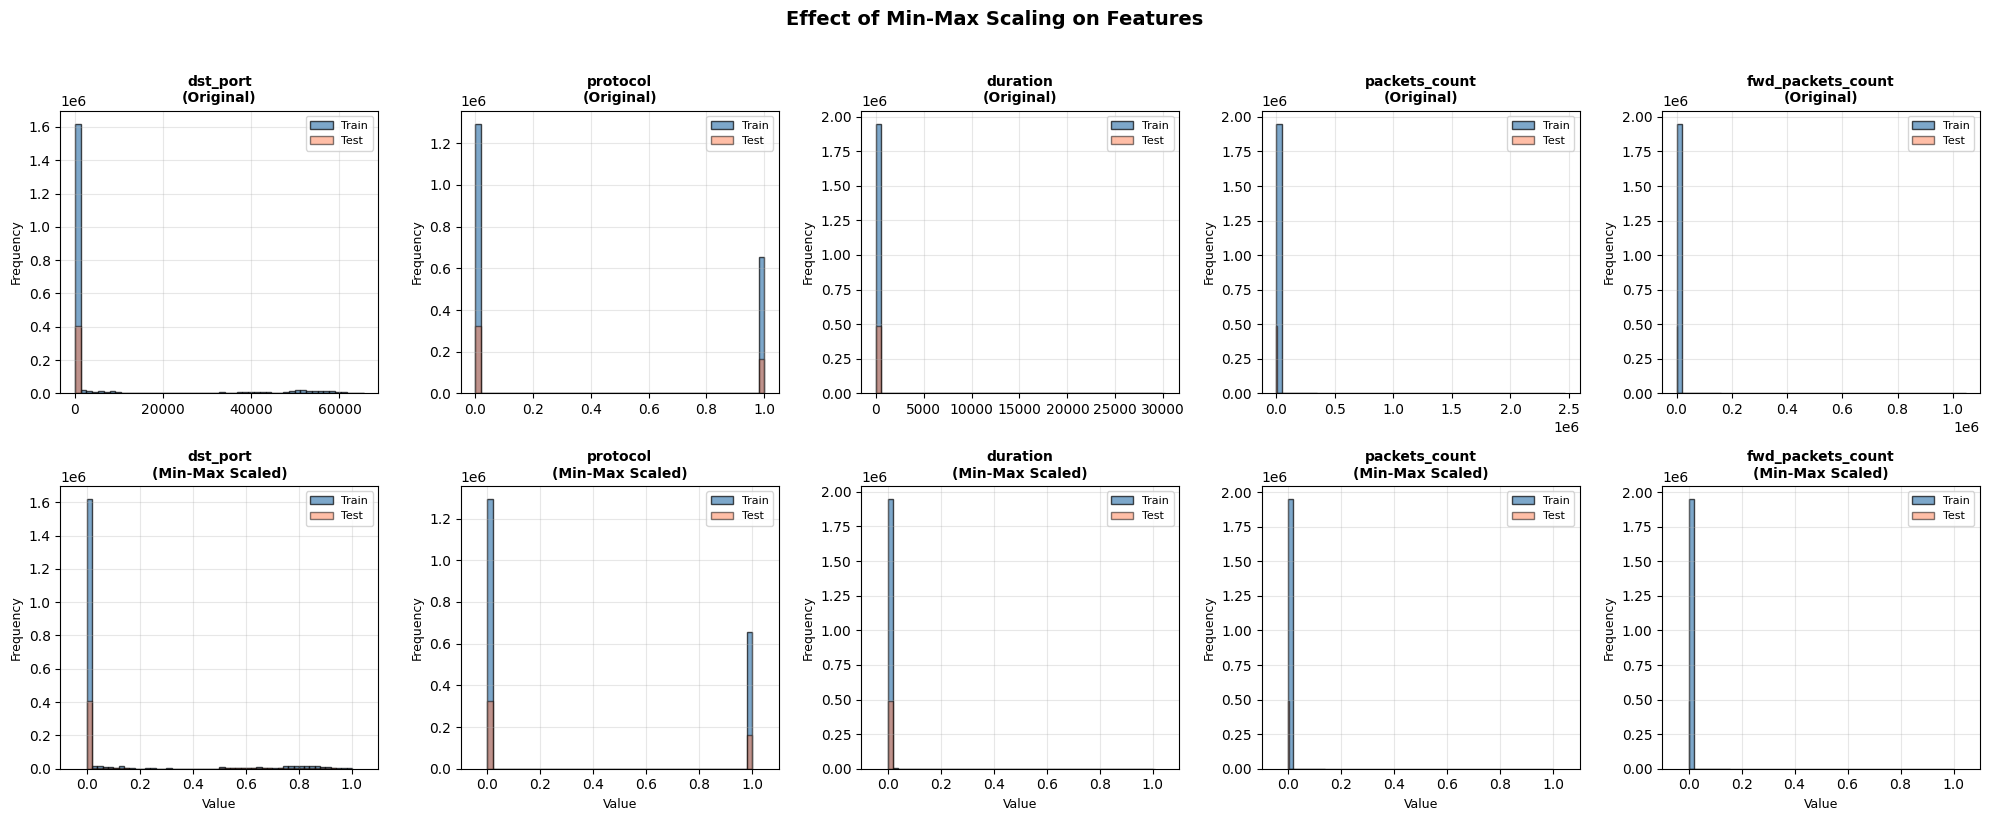

[INFO] Visualization saved to ../assets/imgs/output_charts/minmax_scaling_effect.png

SCALING COMPLETED


In [19]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaling(X_train: pd.DataFrame, X_test: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, MinMaxScaler]:
    """
    :param pd.DataFrame X_train: Training features.
    :param pd.DataFrame X_test: Testing features.
    :return: Scaled training features, scaled testing features, and the fitted scaler.

    Apply Min-Max Scaling to training and testing sets.
    Scales features to range [0, 1] using the formula:
        X_scaled = (X - X_min) / (X_max - X_min)

    Notice thath the Scaler is fitted ONLY on training data to prevent data leakage.
    """
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    visualize_scaling_effect(X_train, X_test, X_train_scaled, X_test_scaled)
    
    return X_train_scaled, X_test_scaled, scaler

def visualize_scaling_effect(X_train_original: pd.DataFrame, 
                             X_test_original: pd.DataFrame,
                             X_train_scaled: np.ndarray, 
                             X_test_scaled: np.ndarray,
                             num_features: int = 5) -> None:
    """
    Visualize the effect of Min-Max Scaling on features.
    
    :param pd.DataFrame X_train_original: Original training features.
    :param pd.DataFrame X_test_original: Original test features.
    :param np.ndarray X_train_scaled: Scaled training features.
    :param np.ndarray X_test_scaled: Scaled test features.
    :param int num_features: Number of features to visualize (default: 5).
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Select first N features for visualization
    num_features = min(num_features, X_train_original.shape[1])
    feature_names = X_train_original.columns[:num_features]
    
    fig, axes = plt.subplots(2, num_features, figsize=(20, 8))
    
    for idx, feature in enumerate(feature_names):
        # Original distribution (before scaling)
        axes[0, idx].hist(X_train_original[feature], bins=50, alpha=0.7, 
                          color='steelblue', edgecolor='black', label='Train')
        axes[0, idx].hist(X_test_original[feature], bins=50, alpha=0.5, 
                          color='coral', edgecolor='black', label='Test')
        axes[0, idx].set_title(f'{feature}\n(Original)', fontsize=10, fontweight='bold')
        axes[0, idx].set_ylabel('Frequency', fontsize=9)
        axes[0, idx].legend(fontsize=8)
        axes[0, idx].grid(True, alpha=0.3)

        # Scaled distribution (after scaling)
        axes[1, idx].hist(X_train_scaled[:, idx], bins=50, alpha=0.7, 
                          color='steelblue', edgecolor='black', label='Train')
        axes[1, idx].hist(X_test_scaled[:, idx], bins=50, alpha=0.5, 
                          color='coral', edgecolor='black', label='Test')
        axes[1, idx].set_title(f'{feature}\n(Min-Max Scaled)', fontsize=10, fontweight='bold')
        axes[1, idx].set_xlabel('Value', fontsize=9)
        axes[1, idx].set_ylabel('Frequency', fontsize=9)
        axes[1, idx].set_xlim(-0.1, 1.1)  # Range [0, 1] with padding
        axes[1, idx].legend(fontsize=8)
        axes[1, idx].grid(True, alpha=0.3)
    
    plt.suptitle('Effect of Min-Max Scaling on Features', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_IMGS_PATH}minmax_scaling_effect.png', 
                dpi=200, bbox_inches='tight')
    plt.show()
    
    print(f"[INFO] Visualization saved to {OUTPUT_IMGS_PATH}minmax_scaling_effect.png")

if __name__ == '__main__':
    X_train_scaled, X_test_scaled, scaler = apply_minmax_scaling(
        X_train, 
        X_test
    )
    
    print("\n" + "="*80)
    print("SCALING COMPLETED")

    


### Balancing Dataset

In [20]:
def visualize_smote_comparison(original_dist: dict, resampled_dist: dict) -> None:
    """
    Simple before/after comparison visualization.
    
    :param dict original_dist: Original class distribution.
    :param dict resampled_dist: Resampled class distribution.
    """
    import matplotlib.pyplot as plt
    
    classes = ['Benign', 'Malicious']
    original = [original_dist.get(0, 0), original_dist.get(1, 0)]
    resampled = [resampled_dist.get(0, 0), resampled_dist.get(1, 0)]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Before SMOTE
    axes[0].bar(classes, original, color=['steelblue', 'coral'], edgecolor='black')
    axes[0].set_title('Before SMOTE', fontsize=13, fontweight='bold')
    axes[0].set_ylabel('Samples')
    axes[0].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(original):
        axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # After SMOTE
    axes[1].bar(classes, resampled, color=['steelblue', 'coral'], edgecolor='black')
    axes[1].set_title('After SMOTE', fontsize=13, fontweight='bold')
    axes[1].set_ylabel('Samples')
    axes[1].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(resampled):
        axes[1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_IMGS_PATH}smote_comparison.png', dpi=200, bbox_inches='tight')
    plt.show()

[INFO] Applying SMOTE oversampling...

Original distribution:
  Benign: 1428580 (73.3%)
  Malicious: 519973 (26.7%)

After SMOTE:
  Benign: 1428580 (50.0%) [+0 synthetic]
  Malicious: 1428580 (50.0%) [+908607 synthetic]

Total: 1948553 → 2857160 samples (+908607)


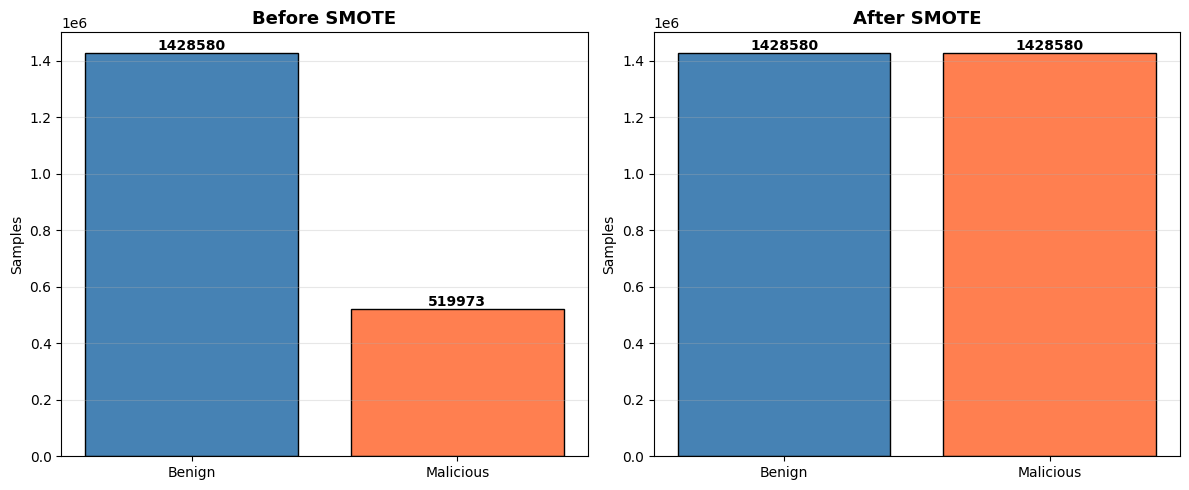


[READY] Train: (2857160, 116), Test: (487139, 116)


In [21]:
def apply_smote_oversampling(X_train: np.ndarray, 
                             y_train: pd.Series,
                             k_neighbors: int = 5,
                             random_state: int = 42) -> Tuple[np.ndarray, np.ndarray]:
    """
    Apply SMOTE oversampling to balance the training set.
    
    :param np.ndarray X_train: Scaled training features.
    :param pd.Series y_train: Training target labels.
    :param int k_neighbors: Number of nearest neighbors (default: 5).
    :param int random_state: Random seed for reproducibility.
    :return: Tuple of (X_train_resampled, y_train_resampled).
    """
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    
    print("[INFO] Applying SMOTE oversampling...")
    
    # Show original distribution
    original_dist = Counter(y_train)
    print(f"\nOriginal distribution:")
    for label, count in sorted(original_dist.items()):
        class_name = 'Benign' if label == 0 else 'Malicious'
        print(f"  {class_name}: {count} ({count/len(y_train)*100:.1f}%)")
    
    # Check and adjust k_neighbors if needed
    minority_count = min(original_dist.values())
    if minority_count <= k_neighbors:
        k_neighbors = max(1, minority_count - 1)
        print(f"[WARNING] Adjusted k_neighbors to {k_neighbors}")

    # Apply SMOTE
    smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    # Show resampled distribution
    resampled_dist = Counter(y_resampled)
    print(f"\nAfter SMOTE:")
    for label, count in sorted(resampled_dist.items()):
        class_name = 'Benign' if label == 0 else 'Malicious'
        original_count = original_dist[label]
        synthetic = count - original_count
        print(f"  {class_name}: {count} ({count/len(y_resampled)*100:.1f}%) [+{synthetic} synthetic]")
    
    print(f"\nTotal: {len(y_train)} → {len(y_resampled)} samples (+{len(y_resampled)-len(y_train)})")
    
    # Visualization
    visualize_smote_comparison(original_dist, resampled_dist)
    
    return X_resampled, y_resampled


if __name__ == '__main__':
    X_train_balanced, y_train_balanced = apply_smote_oversampling(
        X_train_scaled,
        y_train,
        k_neighbors=5,
        random_state=42
    )
    
    print(f"\n[READY] Train: {X_train_balanced.shape}, Test: {X_test_scaled.shape}")

### Training

In [22]:
def train_random_forest(X_train: np.ndarray, 
                       y_train: np.ndarray,
                       n_estimators: int = 300,
                       random_state: int = 42) -> object:
    """
    Train Random Forest classifier for binary IDS classification.
    
    :param np.ndarray X_train: Training features (scaled and balanced).
    :param np.ndarray y_train: Training labels.
    :param int n_estimators: Number of trees (default: 300).
    :param int random_state: Random seed for reproducibility.
    :return: Trained Random Forest model.
    """
    from sklearn.ensemble import RandomForestClassifier
    
    print("="*80)
    print("RANDOM FOREST TRAINING")
    print("="*80)
    print(f"\n[INFO] Training configuration:")
    print(f"       Training samples: {X_train.shape[0]}")
    print(f"       Features: {X_train.shape[1]}")
    print(f"       Trees (n_estimators): {n_estimators}")
    print(f"       Random state: {random_state}\n")
    
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=None,              # No limit on depth
        min_samples_split=2,         # Minimum samples to split node
        min_samples_leaf=1,          # Minimum samples in leaf
        max_features='sqrt',         # sqrt(n_features) at each split
        bootstrap=True,              # Bootstrap samples
        random_state=random_state,
        n_jobs=-1,                   # Use all CPU cores
        verbose=1                    # Show progress
    )
    
    print("[INFO] Starting training...")
    rf_model.fit(X_train, y_train)
    
    print("\n[SUCCESS] Training completed!\n")
    print("="*80 + "\n")
    
    return rf_model


if __name__ == '__main__':
    rf_model = train_random_forest(
        X_train_balanced, 
        y_train_balanced,
        n_estimators=300,
        random_state=42
    )


RANDOM FOREST TRAINING

[INFO] Training configuration:
       Training samples: 2857160
       Features: 116
       Trees (n_estimators): 300
       Random state: 42

[INFO] Starting training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.2min



[SUCCESS] Training completed!




[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


MODEL EVALUATION

[INFO] Generating predictions on test set...


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.7s finished



[RESULTS] Performance Metrics:
          Accuracy:  0.9996
          Precision: 0.9990
          Recall:    0.9997
          F1-Score:  0.9993

[REPORT] Detailed Classification Report:
              precision    recall  f1-score   support

      Benign     0.9999    0.9996    0.9998    357145
   Malicious     0.9990    0.9997    0.9993    129994

    accuracy                         0.9996    487139
   macro avg     0.9994    0.9997    0.9995    487139
weighted avg     0.9996    0.9996    0.9996    487139



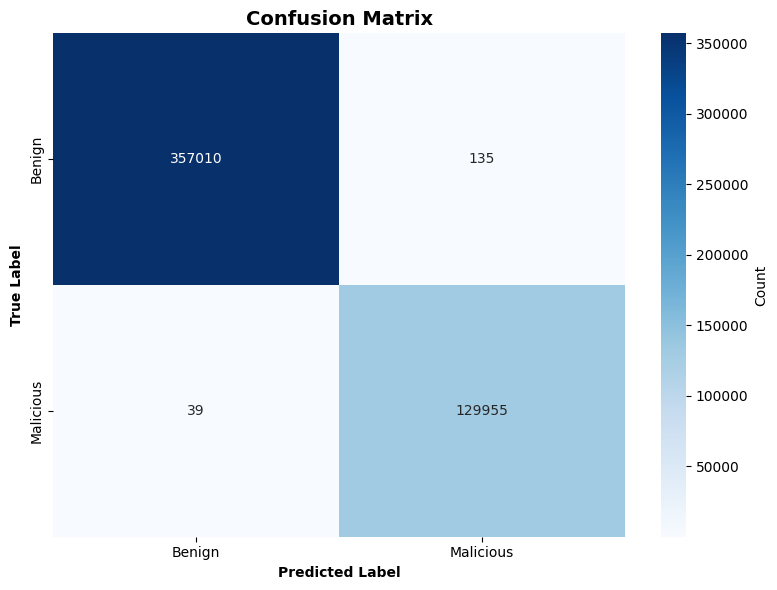

In [23]:
def evaluate_model(model: object,
                  X_test: np.ndarray,
                  y_test: np.ndarray) -> dict:
    """
    Evaluate Random Forest model performance.
    
    :param object model: Trained model.
    :param np.ndarray X_test: Test features.
    :param np.ndarray y_test: Test labels.
    :return: Dictionary with evaluation metrics.
    """
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, 
        f1_score, classification_report, confusion_matrix
    )
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print("="*80)
    print("MODEL EVALUATION")
    print("="*80)
    
    # Predictions
    print("\n[INFO] Generating predictions on test set...")
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"\n[RESULTS] Performance Metrics:")
    print(f"          Accuracy:  {accuracy:.4f}")
    print(f"          Precision: {precision:.4f}")
    print(f"          Recall:    {recall:.4f}")
    print(f"          F1-Score:  {f1:.4f}\n")
    
    # Classification report
    print("[REPORT] Detailed Classification Report:")
    print(classification_report(y_test, y_pred, 
                                target_names=['Benign', 'Malicious'],
                                digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malicious'],
                yticklabels=['Benign', 'Malicious'],
                cbar_kws={'label': 'Count'})
    plt.ylabel('True Label', fontweight='bold')
    plt.xlabel('Predicted Label', fontweight='bold')
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_IMGS_PATH}confusion_matrix.png', dpi=200, bbox_inches='tight')
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }


if __name__ == '__main__':
    metrics = evaluate_model(rf_model, X_test_scaled, y_test)


In [24]:
def save_model(model: object, 
               scaler: object,
               feature_names: list,
               filepath: str = 'models/rf_ids_model.pkl') -> None:
    """
    Save trained model, scaler, and feature names.
    
    :param object model: Trained Random Forest model.
    :param object scaler: Fitted scaler object.
    :param list feature_names: List of selected feature names.
    :param str filepath: Path to save the model (default: 'models/rf_ids_model.pkl').
    """
    import joblib
    import os
    
    # Create directory if not exists
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    
    # Package everything
    model_package = {
        'model': model,
        'scaler': scaler,
        'feature_names': feature_names
    }
    
    # Save
    joblib.dump(model_package, filepath)
    
    print(f"[SUCCESS] Model saved to: {filepath}")
    print(f"          Contains: model, scaler, feature_names")


# USAGE
if __name__ == '__main__':
    save_model(
        rf_model,
        scaler,
        feature_names=X_train_selected.columns.tolist(),
        filepath='models/v1/rf_ids_binary_model.pkl'
    )


[SUCCESS] Model saved to: models/v1/rf_ids_binary_model.pkl
          Contains: model, scaler, feature_names
